     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

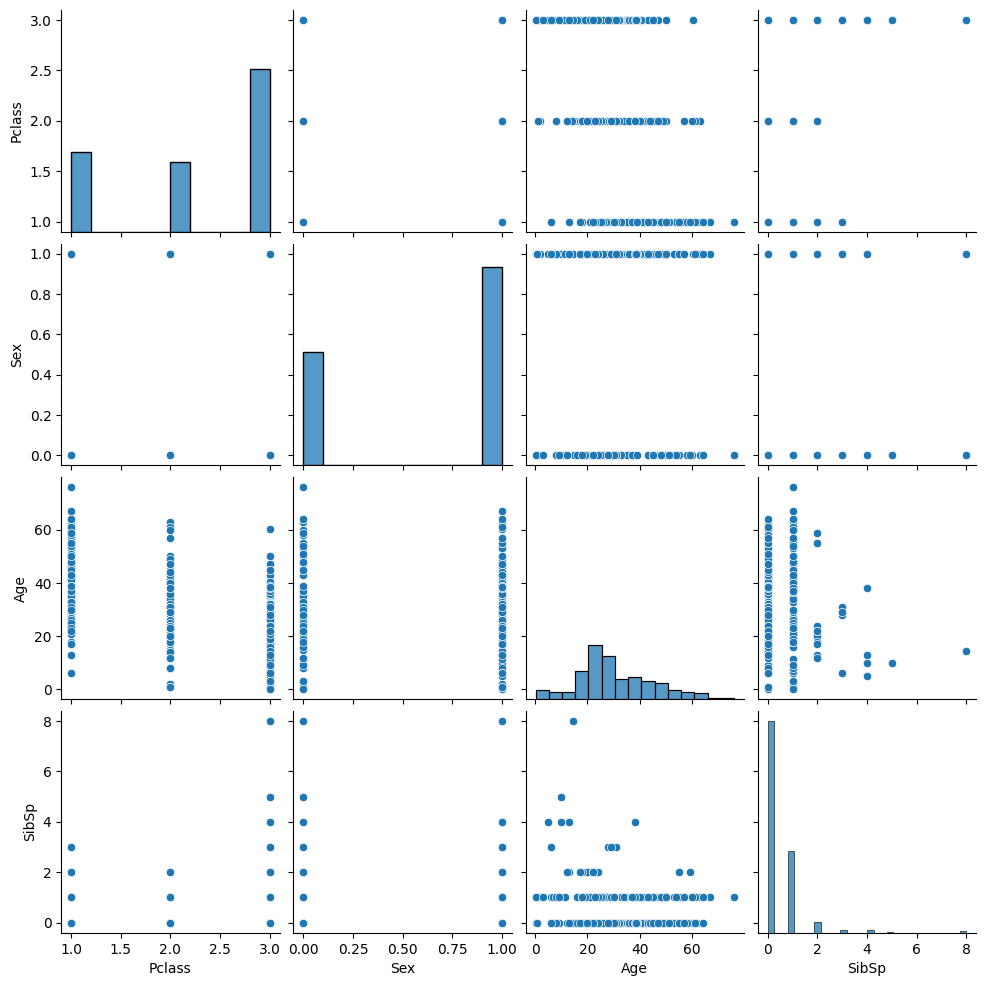

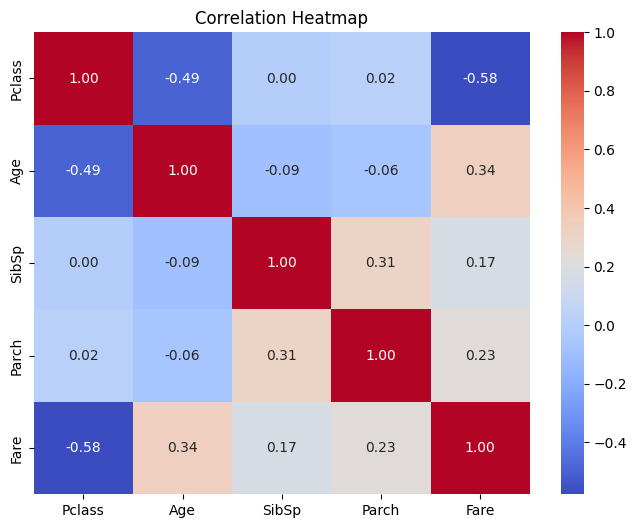

In [ ]:
import pandas as pd
df=pd.read_csv("tested.csv")
print(df)
print(df.head)
print(df.dtypes)
print(df.isnull().sum())
df['Age_ffill'] = df['Age'].ffill()
df['Age_bfill'] = df['Age'].bfill()
print(df[['Age', 'Age_ffill', 'Age_bfill']].head(10))
missing_indices = df[df['Cabin'].isnull()].index
indices_to_fill = missing_indices[:5]
df.loc[indices_to_fill, 'Cabin'] = 'unknown'
print(df['Cabin'].isnull().sum())
print(df.loc[indices_to_fill, 'Cabin'])
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)
num_duplicates = df.shape[0] - df_cleaned.shape[0]
print(f"Removed {num_duplicates} duplicate rows.")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
print(df['Sex'].head())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
print(df[['Fare', 'Fare_scaled']].head())
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp']
sns.pairplot(df[selected_features])
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# New Section